# Lab 01 - Regression
 
---

### Ariana Ghimire

You will be learning about correlation coefficent and graphing line of best fit.


*Estimated Time: ~30 Minutes*

---

### Table of Contents

1.  Correlation Coefficent
2.  Steps to finding R

    a. Standard Divation
    
    b. Standardization of Data
    
    c. Finding R
    
    d. Your turn 

4. Line of Best fit
   
   a. Slope

   b. Intercept

   c. Graphing

   d. Your turn 


In [1]:
import numpy as np
import pandas as pd
from datascience import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('fivethirtyeight')
%matplotlib inline

## Correlation Coefficent 
The correlation coefficient is crucial for data scientists because it quantifies the strength and direction of the linear relationship between two variables. This metric helps identify patterns and relationships in data, enabling scientists to make informed decisions about which features to include in models or how variables interact. A high absolute value of correlation suggests a strong linear relationship, which could be leveraged for predictive modeling, while low or no correlation indicates independence. 

#### Correlation Coefficent varible in r, ranging from -1 to 1. 
###### 0--> no corrilation 
###### 1--> positive corrilation 
###### 2--> negitive corrilation 

#### Here is what that looks like 

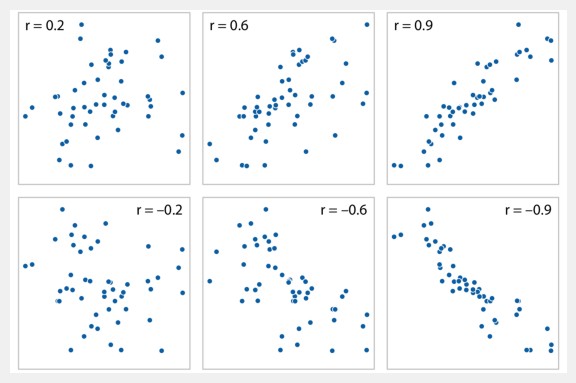

In [2]:
img = mpimg.imread('Fundamentals of Data Visualization.png')
plt.imshow(img)
plt.axis('off') 
plt.show()

## 1. Steps to finding R


We will be working with the The Student Performance Dataset. This dataset was designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

In [3]:
data = pd.read_csv('Student_Performance.csv')
data = data.drop('Extracurricular Activities', axis=1)
data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


In my example I will be finding the corrilation coefficient between Perforamce Index and Previous Scores. We will start by standarizing the data in thoes to columns. 


### 1.1 Standard Divation

To start, we need to find the standard deviation for each column of data. I have created a built-in function that calculates the standard deviation, which measures the spread or dispersion of the data.

To calculate the standard deviation:

1. Subtract the mean from each data point and square the result.

2. Find the average of these squared differences by dividing by the number of data points.

3. Take the square root of this average to obtain the standard deviation, which indicates how spread out the data is from the mean.

Review the code below to ensure you understand how standard deviation (SD) works.

In [1]:
def standard_deviation(array):
    mean = sum(array)/len(array)
    squared_diffrences= (array - mean)**2
    return np.mean(squared_diffrences)**(1/2)
    

In [5]:
## Here we are taking the columns of the table and turing them into array 
P_Scores= data['Previous Scores'].values
P_Index= data['Performance Index'].values

## Now we will find the SD of these 2 data sets 
sd_Scores= standard_deviation(P_Scores)
sd_Index= standard_deviation(P_Index)
print("sd_Scores:", sd_Scores, "sd_Index:", sd_Index)

sd_Scores: 17.3422850718 sd_Index: 19.2115971476


### 1.2 Standardization of Data 
Now, we can standardize the two datasets. This involves subtracting the mean from each data point and dividing the result by the standard deviation. This process ensures that each dataset has a mean of 0 and a standard deviation of 1, making them easier to compare and analyze. Standardization is especially important when working with data that has different scales or units.


In [6]:
Scores = (P_Scores- np.mean(P_Scores))/sd_Scores
Index = (P_Index - np.mean(P_Index))/sd_Index 

### 1.3 Finding R 
In this step, we calculate the correlation coefficient (R) by first multiplying each value in the Scores array by its corresponding value in the Index array. This creates a new array where each element represents the weighted contribution of that score. We then find the average of these values by summing them up and dividing by the total number of elements. This final result, R, measures the strength and direction of the linear relationship between Scores and Index.

Scores_Index_R: 0.915189141226


Text(0, 0.5, 'Performance Index')

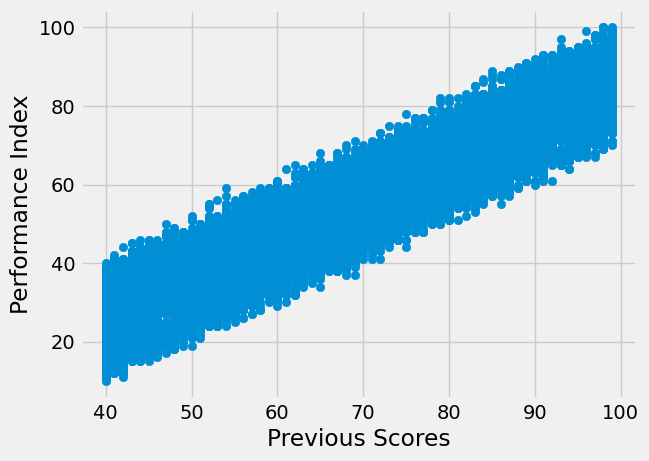

In [7]:
Scores_Index_R = np.average(Scores*Index)
print('Scores_Index_R:', Scores_Index_R )
plt.scatter(data['Previous Scores'], data['Performance Index'], label='Data Points')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')

### 1.4 Conclusion 
Now, using what you have learned about different R values, explain what Scores_Index_R represents in this context. Specifically, discuss whether the correlation is positive or negative, strong or weak, and what that implies about the relationship between Scores and Index. Write your answer in the box below. 

### 1.5 Your turn 

Now, using what you have learned in the above cell, create a function that takes in two column names (as strings) and returns the correlation coefficient between the two datasets. The function should calculate R based on the selected columns from data. 

In [8]:
def find_R( colx, coly ):
    ...
    return 

# test your function to make sure it works by using 'Previous Scores' and 'Performance Index'

### 1.6 Graphing 
Use your find_R fuction to see what has the highest corrilation cofficent with 'Performace Index'. Then graph thoes 2 data sets together.

In [20]:
find_R(..., 'Performance Index')

In [19]:
plt.scatter(data['.....'], data['Performance Index'], label='Data Points')
plt.xlabel('.....')
plt.ylabel('Performance Index')

## 2. Line of Best Fit 
The line of best fit, also called the regression line, is a straight line that best represents the relationship between two variables in a dataset. It minimizes the distance between itself and all the data points, making it useful for predicting values and identifying trends.

To find the line of best fit(y=mx+b), we need to determine the slope (m) and the intercept (b).

### 2.1 Slope 
To calculate the slope, we use R and multiply it by the ratio of the standard deviation of Y to the standard deviation of X

In [11]:
example_m = Scores_Index_R * (sd_Index/sd_Scores)
example_m

1.0138367015830554

Now, create a function that calculates the slope of a regression line given two column names as strings.

In [16]:
def slope(colx, coly): 
    ....
    return 
slope('Previous Scores', 'Performance Index')

### 2.2 Intercept 
To calculate the intercept 'b' you need the average of both data sets, and solve for 

#### b = (y average) - (x average)(slope)  

In [15]:
example_b = np.mean(data['Performance Index'])- (example_m * np.mean(data['Previous Scores']))
example_b

-15.181799427126393

Now, create a function that calculates the intercept of a regression line given two column names as strings.


In [ ]:
def intercept(colx, coly): 
    ....
   return 
intercept('Previous Scores', 'Performance Index')

### 2.3 Graphing 

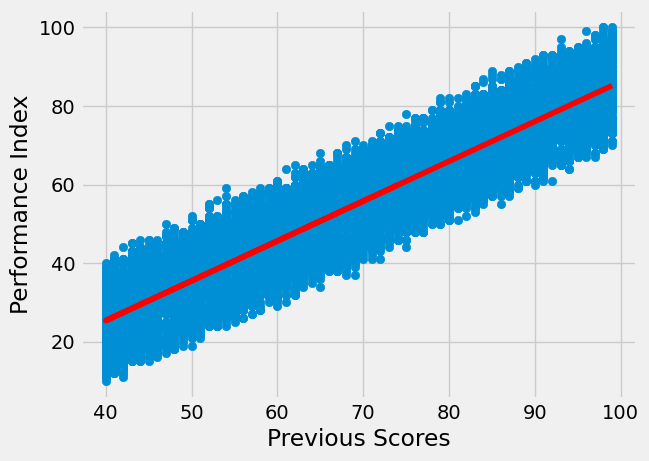

In [18]:

# scatter plot (like before)
plt.scatter(data['Previous Scores'], data['Performance Index'], label='Data Points')

# Line of best fit
plt.plot(data['Previous Scores'], example_m * data['Previous Scores'] + example_b, color='red', label="Best Fit Line")

# Labels and title
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')

# Show the plot
plt.show()

### Your turn 
A big part of a data scientist’s job is looping through data, exploring patterns, and experimenting with different ways to visualize information. By playing around with the data, they can uncover relationships between variables and make predictions. One useful tool for this is regression, which helps us see trends in the data by fitting a line that best represents the relationship between two columns.

Your Turn!
Pick two columns from the dataset that interest you and plot a scatter plot with a regression line using the method above. Try to interpret what the trend tells you! 🚀

In [22]:
### Use all the function you build and reference the code above to do this. You can do it!



## Conclusion 

In this lab, you learned how to create regression lines to visualize relationships between variables in a dataset. By calculating the slope (m) and y-intercept (b), you were able to plot a line of best fit over a scatter plot, helping to identify trends in the data. Understanding regression is a key skill in data science, as it allows us to make predictions and analyze patterns in real-world datasets.


Next Steps
Think about how regression can be used in different fields (e.g., predicting sales, analyzing trends in social media, or understanding climate patterns).
Try experimenting with different datasets and variables to see how the correlation changes.


Remember, data science is all about exploration—keep playing around with the data and asking questions! 🚀